Wk5: Day 4-Linear Regression Practical Example (Part 1)

Pratical example

In [ ]:
Importing the relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

Loading the raw data

In [ ]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

Preprocessing

Exploring the desciptive statistics of the variables

In [ ]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Determining the variable of inte
rest

In [ ]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000



Dealing with missing values

In [ ]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [ ]:
data_no_mv=data.dropna(axis=0)

In [ ]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Exploring the PDFs

C:\Users\Feranmi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

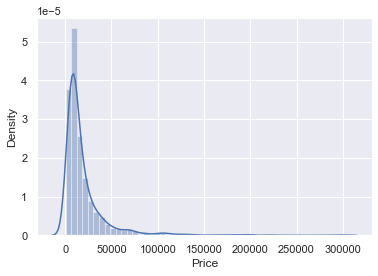

In [ ]:
#There are outliers in this data
sns.distplot(data_no_mv['Price'])

Dealing with outliers

In [ ]:
# We can deal with outliers using quatile
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Feranmi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

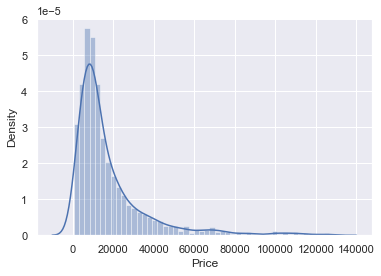

In [ ]:
# Now we have less outliers
sns.distplot(data_1['Price'])

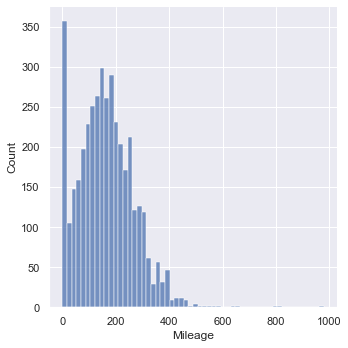

In [ ]:
# We notice the same trend with Mileage: it has outliers
sns.displot(data_no_mv['Mileage'])

In [ ]:
# We can deal with outliers using quatile
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\Feranmi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

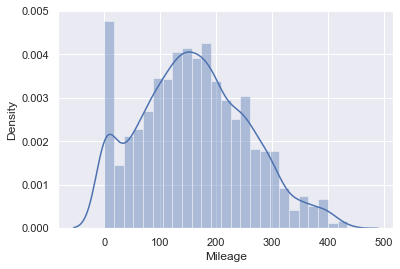

In [ ]:
sns.distplot(data_2['Mileage'])

Engine volume

C:\Users\Feranmi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

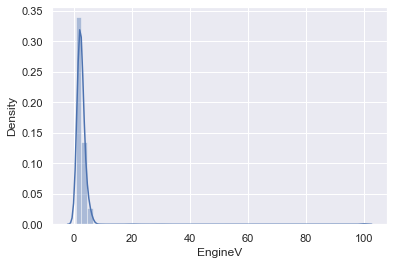

In [ ]:
sns.distplot(data_no_mv['EngineV'])

In [ ]:
data_3 = data_2[data_2['EngineV']<6.5]

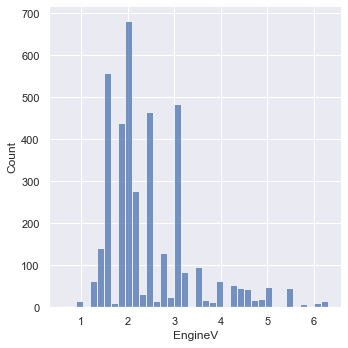

In [ ]:
sns.displot(data_3['EngineV'])

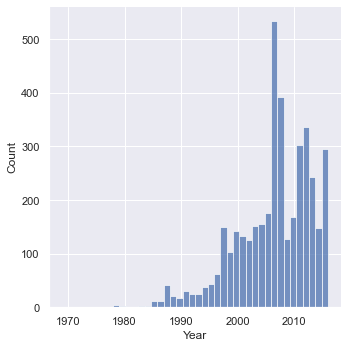

In [ ]:
sns.displot(data_no_mv['Year'])

In [ ]:
q = data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]

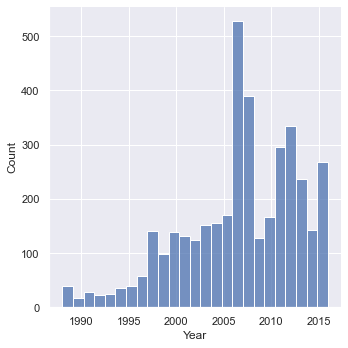

In [ ]:
sns.displot(data_4['Year'])

In [ ]:
data_cleaned = data_4.reset_index(drop=True)


In [ ]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

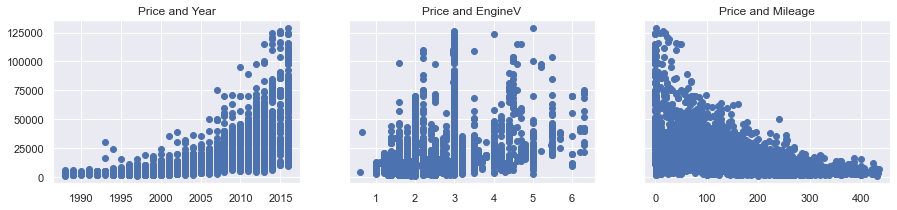

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()
# Ther's no linear corellation

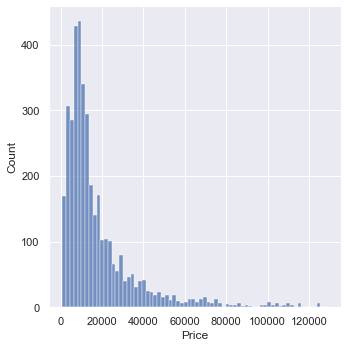

In [ ]:
sns.displot(data_cleaned['Price'])

##### Relaxing the assumption

In [ ]:
#np.log(x) returns the natural logarithm of a number or array of numbers
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


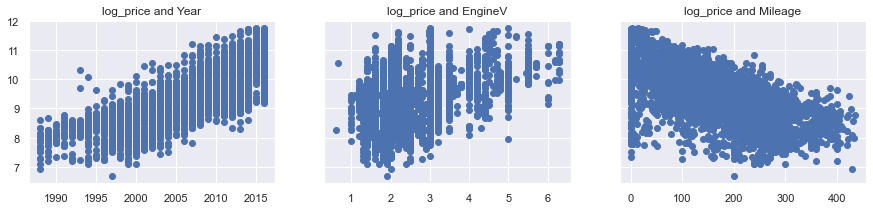

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()
# Now there's a linear corellation

In [ ]:
# We can now drop the Price column
#log transformation is the most common fix for hetrosecadacity
data_cleaned = data_cleaned.drop(['Price'],axis=1)

##### Multicollinearity

It's logical that year and mileage will be correlated

In [ ]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

Note: One of the best ways to check for multicollinearity is through VIF(variance inflation factor)

In [ ]:
# Import model
from statsmodels.stats.outliers_influence import variance_inflation_factor
#find features we want to check for multicollinearity
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]

vif = pd.DataFrame()


vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [ ]:
# VIF =1 (No multicollinearity)
# 1<VIF<5: perfectly okay
# 5<VIF:
vif
# year is too correlated wit 10. so it will be removed

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [ ]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis = 1)

### Create dummy variables

In [ ]:
#pd.get_dummies() spots all categorical variables and creates dummies automatically

data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [ ]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Rearrange a bit

In [ ]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [ ]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [ ]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the input and the targets

In [ ]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis = 1)

### scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [ ]:
# It is not usually recommended to standardize dummy variables
#Scaling has no effect on the prredictive power of dummies,
## once scaled though, they lose their dummy meaning
input_scaled = scaler.transform(inputs)

#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size =0.2, random_state =365)

#### create the regression

In [ ]:
# In fact this is a log-linear regression as the dependent variable is the log of 'Price'
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat = reg.predict(x_train)

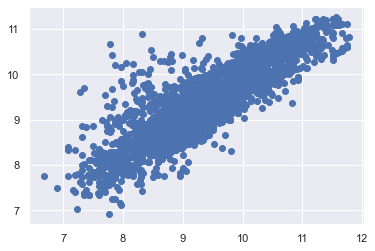

In [ ]:
plt.scatter(y_train, y_hat)
plt.show()

Residual = Differences between the targets and the prediction

C:\Users\Feranmi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

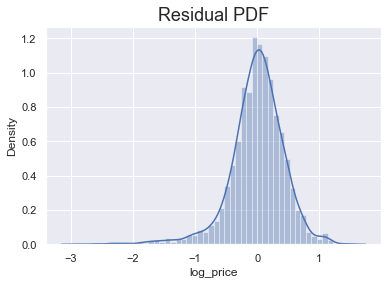

In [ ]:
# The residual are the estimates of the errors
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

In [ ]:
reg.score(x_train,y_train)

0.744996578792662

#### Finding the weights and bias

In [ ]:
reg.intercept_

9.415239458021299

In [ ]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary
# This model is far from interpretable

,Features,weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


### Weight interpretation
- Continuous variable:
1. A positive weight shows that as a feature increases in value, so do the log_price and 'Price' respectively  
 
2. A negative weight shows that as a feature increases in value, log_price and 'Price' decrease
 
- Dummy variable:
1. A positive weight shows that the respective category(Brand) is more expensive than the benchmark(Audi)
2. A negative weight shows that the respective category(Brand) is less expensive than the benchmark(Audi)

##### The bigger the weight the bigger the impact

In [ ]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [ ]:
# Dummies are only compared to their respective benchmark

### Testing

In [ ]:
y_hat_test = reg.predict(x_test)

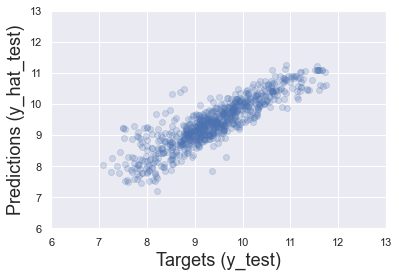

In [ ]:
# plt.scatter() creates a scatter plot
# alpha: specifies the opacity; the more saturated the color, the higher the concentration
plt.scatter(y_test, y_hat_test, alpha =0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

exp(ln(x)) =|x|

 (for a positive x)
 
log(exp(x)) = x

In [ ]:
# The predictions for the log prices!
# np.exp() returns the exponential of x (the Euler number 'e' to the power of x)
df_pf =pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,9.276643,NaN
1,8.160305,7900.0
2,8.929738,NaN
3,8.917842,NaN
4,9.337280,NaN
...,...,...
769,10.297276,6950.0
770,9.280992,NaN
771,9.541258,NaN
772,10.221496,NaN


In [ ]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,9.276643,2300.0
1,8.160305,2800.0
2,8.929738,2500.0
3,8.917842,6400.0
4,9.337280,9150.0
...,...,...
769,10.297276,29500.0
770,9.280992,9600.0
771,9.541258,18300.0
772,10.221496,68500.0


In [ ]:
# Examining the residuals is the same as examining the heart of the algorithm
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [ ]:
# weather an observation is off by +1% or -1% is mostly irrelevant
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [ ]:
df_pf

,Prediction,Target,Residual,Difference%
0,9.276643,2300.0,2290.723357,99.596668
1,8.160305,2800.0,2791.839695,99.708561
2,8.929738,2500.0,2491.070262,99.642810
3,8.917842,6400.0,6391.082158,99.860659
4,9.337280,9150.0,9140.662720,99.897953
...,...,...,...,...
769,10.297276,29500.0,29489.702724,99.965094
770,9.280992,9600.0,9590.719008,99.903323
771,9.541258,18300.0,18290.458742,99.947862
772,10.221496,68500.0,68489.778504,99.985078


In [ ]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,9.385186,18165.817106,18156.431920,99.891468
std,0.776155,19967.858908,19967.283515,0.094644
min,7.185813,1200.000000,1191.980134,99.331678
25%,8.911070,6900.000000,6891.053276,99.869843
50%,9.356012,11600.000000,11591.328049,99.919228
75%,9.911575,20500.000000,20490.532603,99.952144
max,11.256782,126000.000000,125989.381265,99.991572


In [ ]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])
# our model is doing well

,Prediction,Target,Residual,Difference%
609,8.02,1200.00,1191.98,99.33
635,8.25,1450.00,1441.75,99.43
69,7.80,1400.00,1392.20,99.44
532,9.21,1800.00,1790.79,99.49
162,9.21,1800.00,1790.79,99.49
432,8.00,1600.00,1592.00,99.50
664,8.43,1700.00,1691.57,99.50
485,9.18,1900.00,1890.82,99.52
629,8.90,1850.00,1841.10,99.52
428,7.78,1650.00,1642.22,99.53


How to improve our model
1. Use a different set of variables
2. Remove a bigger part of the outliers
3. Use different kinds of transformations